In [28]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

In [29]:
def Cov_fn(y,L):
    temp = m.e(-1*abs(y)/L)/(2*L)
    return(temp)

In [30]:
def alpha_bar(x):
    D = 2
    temp = 1+np.sin(m.pi*((x/D)+0.5))
    return(temp)

In [35]:
def eig_val_even(L,eta):
    temp = (1+L**2*eta**2)**(-1)
    return(temp)

def eig_vec_even(x,eta):
    temp = np.cos(eta*x)/np.sqrt(1+(np.sin(2*eta))/(2*eta))
    return(temp)

def eig_val_odd(L,eta):
    temp = (1+L**2*eta**2)**(-1)
    return(temp)

def eig_vec_odd(x,eta):
    temp = np.sin(eta*x)/np.sqrt(1-(np.sin(2*eta))/(2*eta))
    return(temp)



In [72]:
def transc1(eta):
    L = 1E0
    temp = (1-L*eta*np.tan(eta))
    return (temp)

def transc2(eta):
    L = 1E0
    temp = (L*eta+np.tan(eta))
    return (temp)

def T0(x,Tl):
    temp = Tl+m.e**(-1*x**2/0.05)
    return(temp)

In [73]:
R1 = [0]
R2 = [0]
guess = 0.0
count = 0.0
while ((np.size(R1) + np.size(R2)) < 20):
    guess = guess+1
    root1 = fsolve(transc1,guess,xtol=1E-14)
    root2 = fsolve(transc2,guess,xtol=1E-14)
    count=count+1
    if (abs(R1[-1]-root1) >1E-4):
        R1.append(root1)
    if (abs(R2[-1]-root2) >1E-4):
        R2.append(root2)


In [74]:
X = np.linspace(-1,1,50)
dX = X[1]-X[0]
dt =  .00001
Num_realization = 50
T_samp   = np.zeros((np.size(X),Num_realization))
T0_samp  = np.zeros((np.size(X),Num_realization))
#plt.figure(figsize=(6,6))


start = time.time()
for l in range(0,Num_realization):
    Alpha  =  np.zeros(np.size(X))
    Alpha2 =  np.zeros(np.size(X))
    Sum1   =  np.zeros(np.size(X))
    Sum2   =  np.zeros(np.size(X))
    Lp     =  1E0
    for j in range (0,np.size(R1)):
        Sum = np.sqrt(eig_val_even(Lp,R1[j]))*eig_vec_even(X[:],R1[j])*np.random.normal(0,.1,size=None)
        Alpha[:] = 0.5*alpha_bar(X[:])+Sum
    
    for k in range (0,np.size(R2)):
        Sum = np.sqrt(eig_val_odd(Lp,R2[k]))*eig_vec_odd(X[:],R2[k])*np.random.normal(0,.1, size=None)
        Alpha2[:] = 0.5*alpha_bar(X[:])+Sum
    
    Alpha[:] = Alpha2[:]+Alpha[:]
    Tl = np.random.normal(1,0.01)
    Tr = Tl
    T  = T0(X,Tl)
    T0_samp[:,l] = T0(X,Tl)
    for k in range (1,200):
        for i in range (1,np.size(T)-2):
            #A    = alpha_bar(X[i])*dt/dX**2
            A    = Alpha[i]*dt/dX**2
            B    = (Alpha[i+1]-Alpha[i-1])*dt/(4*dX*dX)
            T[i] = T[i]+A*(T[i+1]-2*T[i]+T[i-1])+B*(T[i+1]-T[i-1])
            if(k == 199): 
                #T_samp.append(T)
                T_samp[:,l] = T
end = time.time()

end-start

/Users/akhilmarayikkottuvijayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/akhilmarayikkottuvijayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/akhilmarayikkottuvijayan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


2.9849131107330322

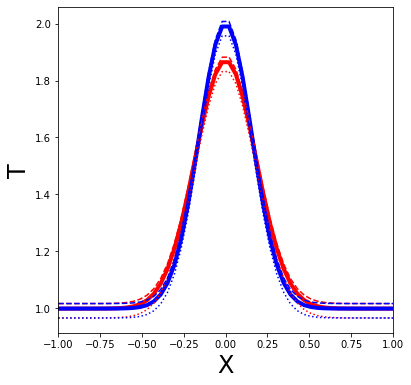

In [75]:
Avg_T  = np.zeros((np.size(X)))
Max_T  = np.zeros((np.size(X)))
Min_T  = np.zeros((np.size(X)))

Avg_T0 = np.zeros((np.size(X)))
Max_T0 = np.zeros((np.size(X)))
Min_T0 = np.zeros((np.size(X)))



for i in range (0,Num_realization):
    Avg_T  = Avg_T  + T_samp[:,i]
    Avg_T0 = Avg_T0 + T0_samp[:,i]
Avg_T  = Avg_T /Num_realization
Avg_T0 = Avg_T0/Num_realization


for i in range (0,np.size(X)):
    Max_T[i]  = max(T_samp[i,:] )
    Min_T[i]  = min(T_samp[i,:] )
    Max_T0[i] = max(T0_samp[i,:])
    Min_T0[i] = min(T0_samp[i,:])
    

plt.figure(figsize=(6,6))
plt.xlabel('X',fontsize=24)
plt.ylabel('T',fontsize=24)
plt.xlim([-1,1])
#plt.ylim([1E-20,10])
plt.plot(X,Avg_T ,'r',linewidth=4)
plt.plot(X,Avg_T0,'b',linewidth=4)
plt.plot(X,Max_T,'r--')
plt.plot(X,Min_T,'r:')
plt.plot(X,Min_T0,'b:')
plt.plot(X,Max_T0,'b--')

plt.savefig('Thermal1eneg3.eps')

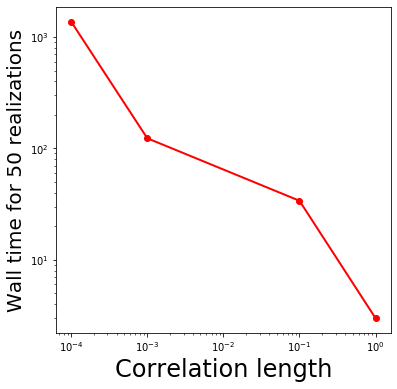

In [86]:
plt.figure(figsize=(6,6))
plt.xlabel('Correlation length',fontsize=24)
plt.ylabel('Wall time for 50 realizations',fontsize=20)
L  = np.array([1e-4,1e-3,1e-1,1])
CT = np.array([1374.901,123.340,33.858,2.985])
plt.loglog(L,CT,'r',linewidth=2)
plt.loglog(L,CT,'ro',linewidth=2)

plt.savefig('Q4.eps')